# import requests, zipfile, io
# url = "https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip"
# response = requests.get(url)
# with zipfile.ZipFile(io.BytesIO(response.content)) as z:
#     z.extractall("/afs/glue.umd.edu/home/glue/k/b/kbodla/home/MSML602_Final_Project")

                                           INTRODUCTION

The purpose of this tutorial is to guide you through the data science lifecycle, showcasing a variety of data science concepts. By following this process, we aim to build a predictive model that estimates the length of a package using attributes available in the Amazon ML Challenge 2023 dataset. The data science lifecycle we’ll follow includes:

1. Data collection
2. Data processing
3. Exploratory analysis and data visualization
4. Model building, analysis, and testing
5. Interpretation of results

The overarching goal of the data science lifecycle is to uncover patterns, answer a specific question, or solve a practical problem. In this case, we aim to address the question: What attributes of a package can be used to accurately predict its length? While this tutorial won’t deliver an exact or definitive solution, it will provide insights into the key factors influencing package length and establish a framework for future improvements.

By building a model to predict package length, we can help optimize several aspects of logistics and operations. For instance, accurate predictions can assist in shipping cost estimation, warehouse storage planning, and vehicle load optimization. Understanding these factors can also support sustainability efforts by minimizing packaging waste and improving resource allocation.

Through this analysis, we will explore how features in the dataset—such as package weight, dimensions, type of product, and shipping method—correlate with length. For example:

If heavier packages tend to be longer, weight could be a significant predictor.
If certain product categories typically have consistent packaging sizes, product type could play a key role.
By addressing the challenge of predicting package length, this project illustrates how machine learning can be applied to solve real-world problems and deliver operational efficiencies.

                                 DATA COLLECTION
The first step in building a predictive model is to gather the data necessary to answer our question. Data collection is a critical phase in the data science lifecycle, as the quality and relevance of the dataset directly influence the performance and accuracy of the machine learning model. In this case, the dataset we use will serve as the foundation for training the model to predict package length.

In this project, we will use the dataset provided as part of the Amazon ML Challenge 2023. This dataset has been curated specifically to capture attributes relevant to packages handled in logistics operations.

In a real-world scenario, companies often need to collect their own data through experiments, manual measurements, or automated systems like barcode scanners and IoT sensors. However, datasets like the one we are using for this project are pre-collected and readily available, saving significant time and effort in the data collection process. Since this dataset has already been prepared and made accessible, we can focus on processing and analyzing it.

By using this dataset, we can ensure our predictions are grounded in real-world logistics data, allowing our model to uncover meaningful patterns and relationships. A good dataset not only makes model training easier but also ensures that the predictions are accurate and applicable to real scenarios.


In [1]:
import pandas as pd
df = pd.read_csv('dataset/train.csv')
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [2]:
df.isnull().sum()

PRODUCT_ID               0
TITLE                   13
BULLET_POINTS       837366
DESCRIPTION        1157382
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [3]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) & 
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424
6,413758,Ungifted: My Life and Journey,NaN,NaN,23,598.000
11,833712,La Mure / Valbonnais gps,NaN,NaN,1,433.070
12,648364,J'ecris des lettres! premiers exercices d'écri...,NaN,NaN,1,759.841
13,1991694,Mediterranean diet for beginners: 7Benefits of...,NaN,NaN,32,600.000
...,...,...,...,...,...,...
2249679,111250,When Work Becomes Optional,NaN,NaN,87,600.000
2249681,421168,Learning to Swim,NaN,NaN,12743,525.000
2249682,38572,"Holy Bible: New International Version, Camel/c...",NaN,NaN,129,488.188
2249691,571566,Comedy Wildlife Photography Awards: The perfec...,NaN,NaN,2968,271.250


From the analysis, we observe that the title column contains only 13 unique values across 2 million rows, which makes it a concise but potentially limited feature. Removing rows with missing values in the title column is straightforward, but this approach risks losing valuable information from other columns, such as description and bullet points. To address this, we can explore combining these columns to enhance the dataset's richness. For instance, we could use combinations like title + bullet points, title + description, or bullet points + description. However, it’s worth noting that approximately 783,500 rows are null or empty simultaneously in both bullet points and description, making such combinations prone to significant data loss. A more efficient approach would be concatenating all three columns (title + description + bullet points) into a single feature. This strategy minimizes the impact of missing or empty values by leveraging information from all available columns, ensuring maximum retention of rows while enriching the feature set.

In [4]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) & 
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))&
(df['TITLE'].isna() | (df['TITLE'] == ''))]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
66157,1804,NaN,NaN,NaN,222,507.873
196485,164542,NaN,NaN,NaN,150,575.000
420890,16935,NaN,NaN,NaN,6104,290.000
948754,566503,NaN,NaN,NaN,109,555.117
1144461,678966,NaN,NaN,NaN,1,685.038
1364032,548186,NaN,NaN,NaN,1,1228.344
1716822,20369,NaN,NaN,NaN,154,1040.000
1879925,496531,NaN,NaN,NaN,1,799.211
1885213,555363,NaN,NaN,NaN,151,846.455
2108453,113675,NaN,NaN,NaN,6044,600.000


With the newly created feature combining title + bullet points + description, we observe only 12 rows with simultaneous missing values. Given the large sample size, these rows can be effortlessly removed without any significant impact on the dataset.

In [5]:
print(df['PRODUCT_TYPE_ID'].nunique())
print(df['PRODUCT_ID'].nunique())
len(df)

12907
2249698


2249698

We observe that the dataset's length matches the number of unique values in the product_id column, indicating that each row represents a distinct product. Meanwhile, there are 12,907 unique values in the product_type_id column. This suggests that product_type_id could represent broader categories, such as "books," while product_id identifies unique items within those categories. For example, a "Sherlock Holmes" book and a "Cooking" book may both fall under the "books" category but are distinct products. This insight leads us to the next step: analyzing the length statistics for each product_type_id

In [6]:
import matplotlib.pyplot as plt


stats = df.groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].agg(['mean', 'median']).reset_index()

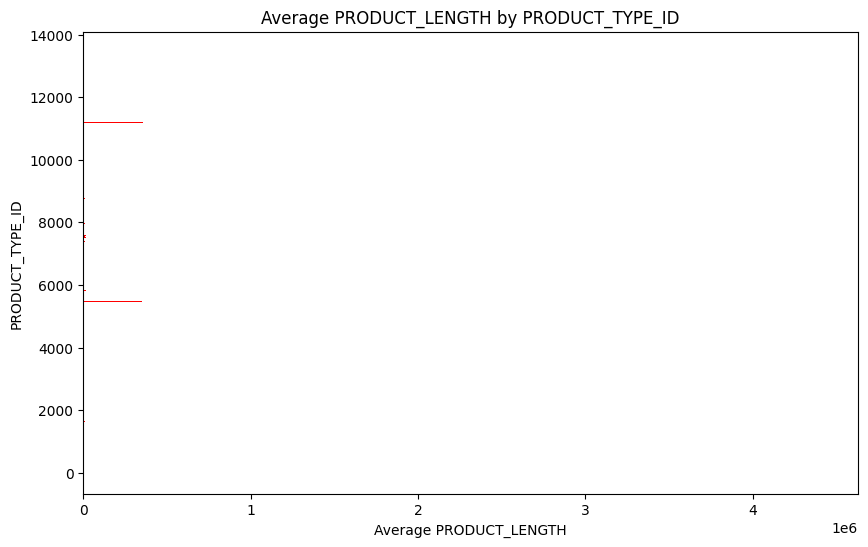

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='red')
plt.xlabel('Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

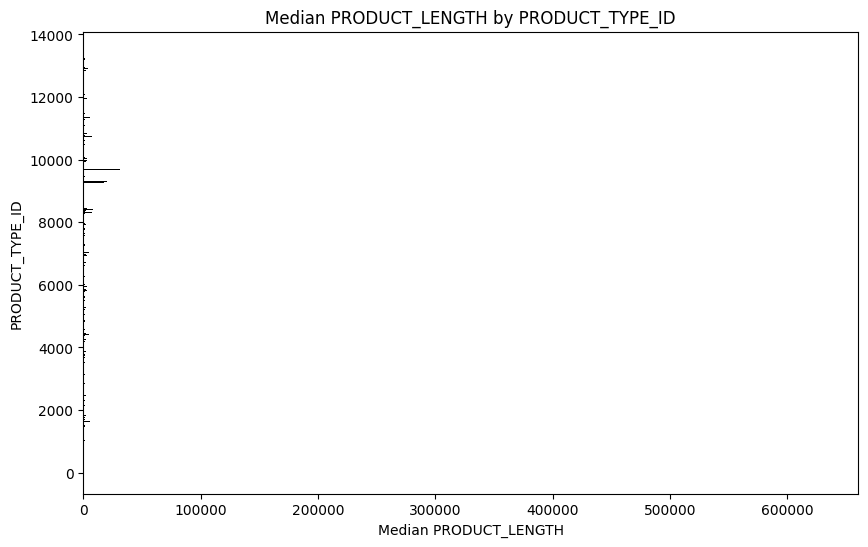

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='black')
plt.xlabel('Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

the above plots are not interpretable lets change the scale to log scale to plot the distributions

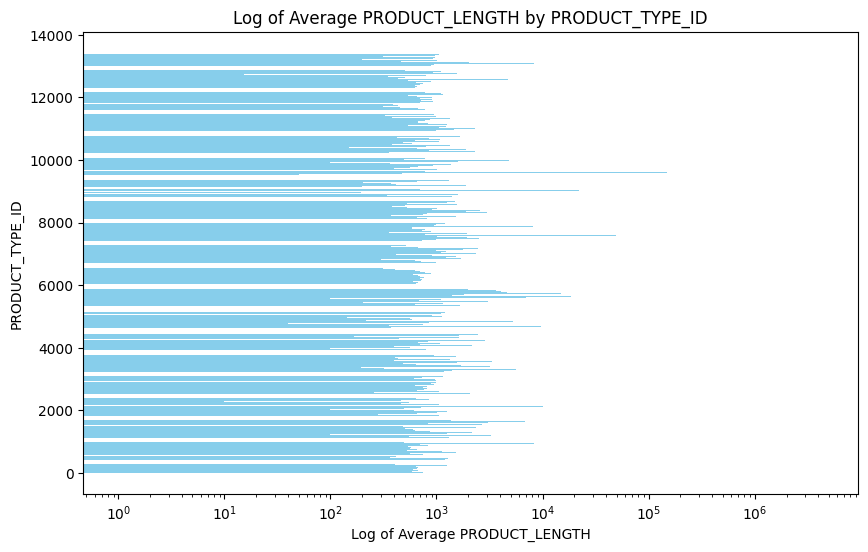

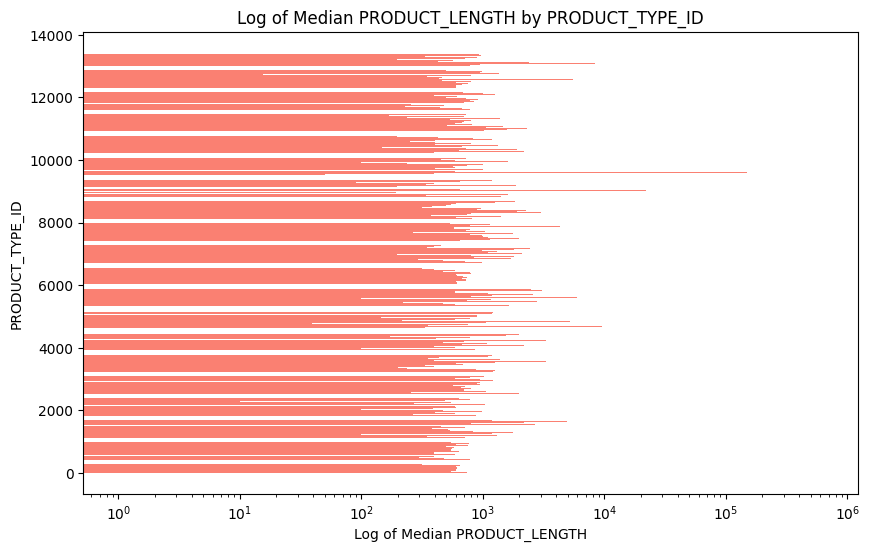

In [9]:
import numpy as np


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='skyblue')
plt.xscale('log') 
plt.xlabel('Log of Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='salmon')
plt.xscale('log')  
plt.xlabel('Log of Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


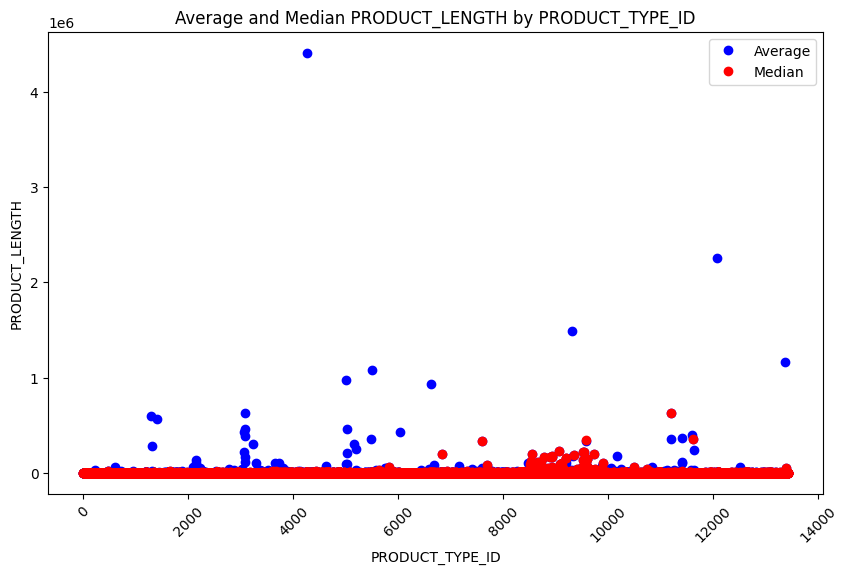

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(stats['PRODUCT_TYPE_ID'], stats['mean'], 'bo', label='Average')
plt.plot(stats['PRODUCT_TYPE_ID'], stats['median'], 'ro', label='Median')
plt.xlabel('PRODUCT_TYPE_ID')
plt.ylabel('PRODUCT_LENGTH')
plt.title('Average and Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.legend()
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_87265/2223150103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['mean'], palette='Set2')
/tmp/ipykernel_87265/2223150103.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
/tmp/ipykernel_87265/2223150103.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['median'], palette='Set2')
/tmp/ipykernel_87265/2223150103.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

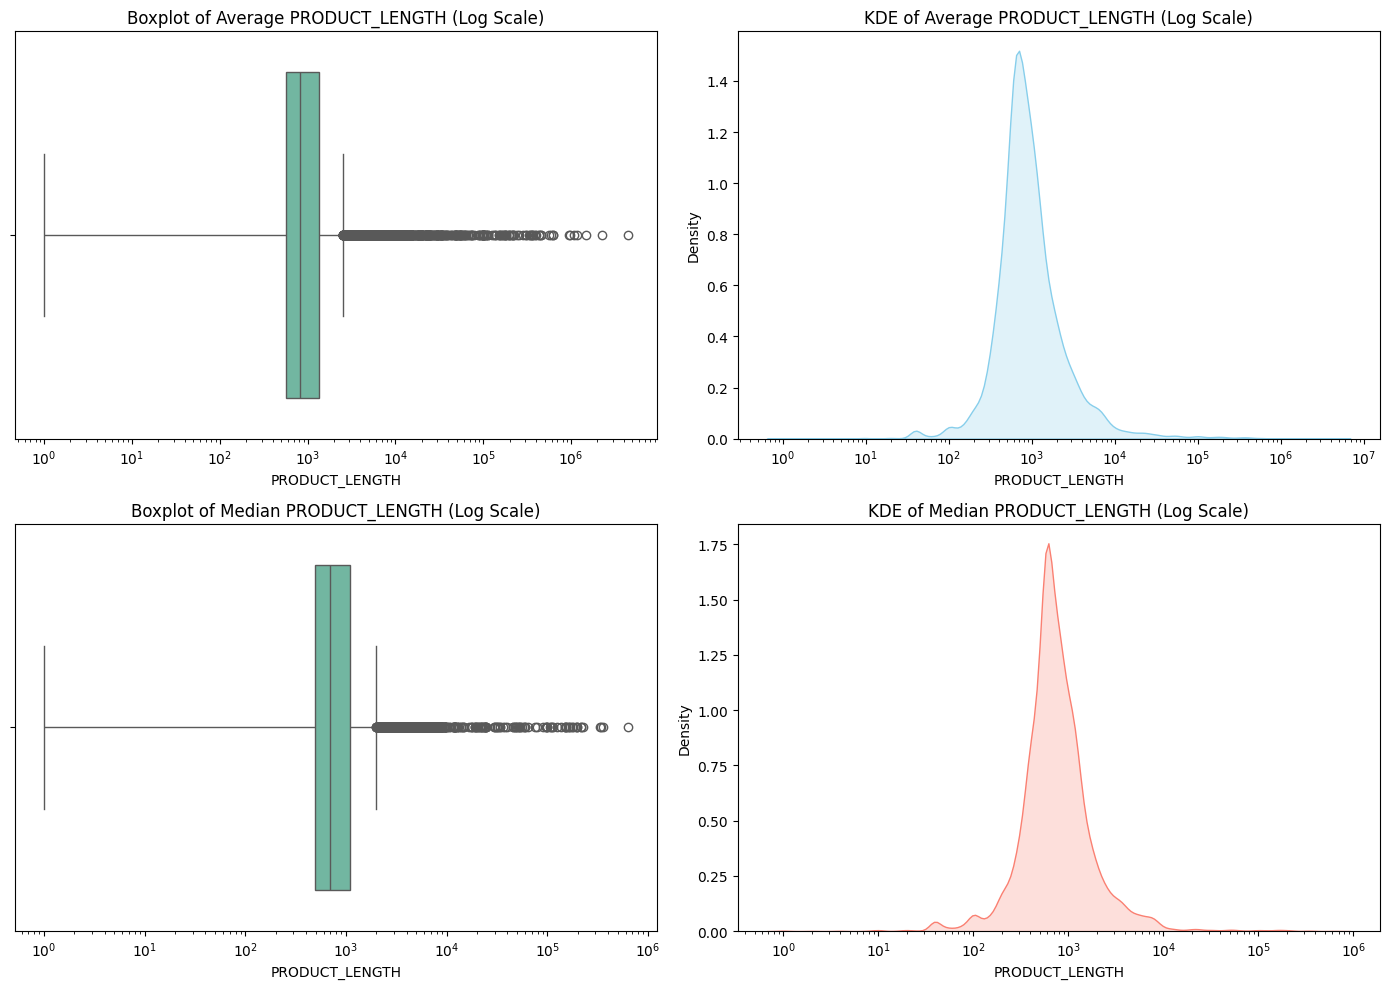

In [11]:
import seaborn as sns


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x=stats['mean'], palette='Set2')
plt.xscale('log') 
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 2)
sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 3)
sns.boxplot(x=stats['median'], palette='Set2')
plt.xscale('log')  
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Median PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 4)
sns.kdeplot(stats['median'], log_scale=True, shade=True, color='salmon')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Median PRODUCT_LENGTH (Log Scale)')


plt.tight_layout()
plt.show()


we can see that both the avg and median for each prodcut_type have similar distribution, all the above data plots are sampled for each prodcut type to show variations in them

With the exploratory data analysis (EDA) complete, the next step is text processing. One common method to extract information from text is TF-IDF, but it often proves insignificant for capturing deep contextual meaning. An alternative is using Word2Vec, which generates word vectors; however, a limitation of Word2Vec is that the vectors are computed based on individual words, without considering their meaning or placement within a sentence.

A more advanced approach is to use Sentence Transformers, which overcome this drawback by creating embeddings based on both the meaning of the words and their position in the sentence. For example, consider the sentences: "The bank was crowded" and "The riverside bank was crowded." Word2Vec would produce identical representations for the word "bank" in both cases. In contrast, Sentence Transformers differentiate between the two contexts, representing "bank" based on its specific meaning and placement in each sentence.

In [12]:
df['all_feat'] = 'Title: ' + df['TITLE'].fillna('') + ' Bullet points: ' + df['BULLET_POINTS'].fillna('') + ' Description: ' + df['DESCRIPTION'].fillna('')

In [13]:
df['all_feat'].isnull().sum()

np.int64(0)

In [14]:
df['all_feat'][0]

'Title: ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS Bullet points: [LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes inbuilt tieback to hold the curtain | Completely finished and ready to hang on walls & windows,MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS,BLACKOUT CURTAIN: 100% opaque & heavy premium cotton canvas fabric | Tight knitted, long life & durable fabric | Printing only on front side with a plain colour back side,MADE TO PERFECTION: Large eyelets at the top to put hanging hooks | Perfectly tailored seams for durability | Refined stitching with a

In [15]:
df['PRODUCT_TYPE_ID'].value_counts()

PRODUCT_TYPE_ID
1        121199
12064     57554
0         50505
123       31527
6104      29690
          ...  
11332         1
9522          1
4935          1
5005          1
8618          1
Name: count, Length: 12907, dtype: int64

In [16]:
from sentence_transformers import SentenceTransformer
import torch
from tqdm import tqdm

device = 'cuda' 


model = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)


if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)


embeddings = []


batch_size = 256  
all_features = df['all_feat'].fillna('').tolist()

for i in tqdm(range(0, len(all_features), batch_size)):
    batch = all_features[i:i + batch_size]

    embeddings_batch = model.module.encode(batch, convert_to_tensor=True, device=device)
    embeddings.extend(embeddings_batch.cpu().numpy())


embeddings = np.stack(embeddings)


100%|███████████████████████████████████████████████████████████████████████████████| 8788/8788 [12:12<00:00, 11.99it/s]


In [17]:
torch.cuda.empty_cache()

Souri's Part

Implementation of Linear Regression

In [19]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X = torch.tensor(embeddings, dtype=torch.float32)
y = torch.tensor(df['PRODUCT_LENGTH'].values, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [20]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader.dataset):.4f}, Validation Loss: {val_loss/len(test_loader.dataset):.4f}")

In [21]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

linear_model = LinearRegressionModel(X.shape[1]).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.001)

train_model(linear_model, train_loader, test_loader, criterion, optimizer)

Epoch 1/10, Train Loss: 3931.2108, Validation Loss: 3358.3333
Epoch 2/10, Train Loss: 3734.9043, Validation Loss: 3296.6370
Epoch 3/10, Train Loss: 3704.9207, Validation Loss: 3281.5473
Epoch 4/10, Train Loss: 3693.9918, Validation Loss: 3273.7222
Epoch 5/10, Train Loss: 3687.8606, Validation Loss: 3268.9690
Epoch 6/10, Train Loss: 3683.9542, Validation Loss: 3265.7619
Epoch 7/10, Train Loss: 3681.2313, Validation Loss: 3263.4586
Epoch 8/10, Train Loss: 3679.2102, Validation Loss: 3261.6999
Epoch 9/10, Train Loss: 3677.6286, Validation Loss: 3260.3005
Epoch 10/10, Train Loss: 3676.3495, Validation Loss: 3259.1456


Implementing a Two Layer Neural Network

In [22]:
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim):
        super(TwoLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        return self.layer2(x)

nn_model = TwoLayerNN(X.shape[1]).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

train_model(nn_model, train_loader, test_loader, criterion, optimizer)

Epoch 1/10, Train Loss: 3669.0456, Validation Loss: 3214.2208
Epoch 2/10, Train Loss: 3618.8896, Validation Loss: 3193.1666
Epoch 3/10, Train Loss: 3604.1722, Validation Loss: 3181.6413
Epoch 4/10, Train Loss: 3594.4293, Validation Loss: 3173.6063
Epoch 5/10, Train Loss: 3587.5720, Validation Loss: 3168.0801
Epoch 6/10, Train Loss: 3582.9111, Validation Loss: 3164.3775
Epoch 7/10, Train Loss: 3579.6170, Validation Loss: 3161.5816
Epoch 8/10, Train Loss: 3577.0271, Validation Loss: 3159.2462
Epoch 9/10, Train Loss: 3574.8875, Validation Loss: 3157.3503
Epoch 10/10, Train Loss: 3572.9950, Validation Loss: 3155.5774


Implementing Lasso Regression

In [23]:
lasso_model = LinearRegressionModel(X.shape[1]).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(lasso_model.parameters(), lr=0.001, weight_decay=0.01)

train_model(lasso_model, train_loader, test_loader, criterion, optimizer)

Epoch 1/10, Train Loss: 3961.2332, Validation Loss: 3429.7140
Epoch 2/10, Train Loss: 3833.3683, Validation Loss: 3410.6773
Epoch 3/10, Train Loss: 3825.3736, Validation Loss: 3405.7403
Epoch 4/10, Train Loss: 3820.4334, Validation Loss: 3401.1841
Epoch 5/10, Train Loss: 3816.4219, Validation Loss: 3398.2822
Epoch 6/10, Train Loss: 3814.6603, Validation Loss: 3397.8941
Epoch 7/10, Train Loss: 3814.4597, Validation Loss: 3396.9098
Epoch 8/10, Train Loss: 3814.3022, Validation Loss: 3397.7799
Epoch 9/10, Train Loss: 3814.3842, Validation Loss: 3397.3654
Epoch 10/10, Train Loss: 3814.3797, Validation Loss: 3397.0856


Implementing XG Boost

In [25]:
pip install xgboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 80.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train_np = X_train.cpu().numpy()
X_test_np = X_test.cpu().numpy()
y_train_np = y_train.cpu().numpy()
y_test_np = y_test.cpu().numpy()

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train_np, y_train_np)

xgb_predictions = xgb_model.predict(X_test_np)

xgb_mae = mean_absolute_error(y_test_np, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test_np, xgb_predictions))
xgb_r2 = r2_score(y_test_np, xgb_predictions)

print(f"XGBoost - MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")

XGBoost - MAE: 7367.4238, RMSE: 657572.4375, R²: -0.0789


Implementing LightGBM Regressor

In [28]:
pip install lightgbm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

lgbm_model.fit(X_train_np, y_train_np)

lgbm_predictions = lgbm_model.predict(X_test_np)

lgbm_mae = mean_absolute_error(y_test_np, lgbm_predictions)
lgbm_rmse = np.sqrt(mean_squared_error(y_test_np, lgbm_predictions))
lgbm_r2 = r2_score(y_test_np, lgbm_predictions)

print(f"LightGBM - MAE: {lgbm_mae:.4f}, RMSE: {lgbm_rmse:.4f}, R²: {lgbm_r2:.4f}")

/export/kbodla/venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.396377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 1799758, number of used features: 384
[LightGBM] [Info] Start training from score 4155.325092
LightGBM - MAE: 12164.0946, RMSE: 702158.5295, R²: -0.2302


Implementing ElasticNet Regression

In [30]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(
    alpha=0.1,  
    l1_ratio=0.5,  
    max_iter=1000,
    random_state=42
)

elastic_model.fit(X_train_np, y_train_np)

elastic_predictions = elastic_model.predict(X_test_np)

elastic_mae = mean_absolute_error(y_test_np, elastic_predictions)
elastic_rmse = np.sqrt(mean_squared_error(y_test_np, elastic_predictions))
elastic_r2 = r2_score(y_test_np, elastic_predictions)

print(f"ElasticNet - MAE: {elastic_mae:.4f}, RMSE: {elastic_rmse:.4f}, R²: {elastic_r2:.4f}")

ElasticNet - MAE: 9728.9395, RMSE: 633104.1875, R²: -0.0001


/export/kbodla/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+15, tolerance: 3.930e+14
  model = cd_fast.enet_coordinate_descent(


Predicting on the Test Data

In [31]:
def evaluate_model(model, data_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
            y_pred = model(X_batch)
            predictions.extend(y_pred.cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())
    return predictions, actuals

In [32]:
predictions, actuals = evaluate_model(linear_model, test_loader)

In [33]:
predictions, actuals = evaluate_model(nn_model, test_loader)

In [34]:
predictions, actuals = evaluate_model(lasso_model, test_loader)

In [36]:
def evaluate_sklearn_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    actuals = y_test
    return predictions, actuals

In [37]:
xgb_predictions, xgb_actuals = evaluate_sklearn_model(xgb_model, X_test_np, y_test_np)

In [38]:
lgbm_predictions, lgbm_actuals = evaluate_sklearn_model(lgbm_model, X_test_np, y_test_np)

In [39]:
elastic_predictions, elastic_actuals = evaluate_sklearn_model(elastic_model, X_test_np, y_test_np)

In [40]:
print("Evaluating Linear Regression...")
linear_predictions, linear_actuals = evaluate_model(linear_model, test_loader)

print("Evaluating Two-Layer Neural Network...")
nn_predictions, nn_actuals = evaluate_model(nn_model, test_loader)

print("Evaluating Lasso Regression...")
lasso_predictions, lasso_actuals = evaluate_model(lasso_model, test_loader)

print("Evaluating XGBoost...")
xgb_predictions, xgb_actuals = evaluate_sklearn_model(xgb_model, X_test_np, y_test_np)

print("Evaluating LightGBM...")
lgbm_predictions, lgbm_actuals = evaluate_sklearn_model(lgbm_model, X_test_np, y_test_np)

print("Evaluating ElasticNet...")
elastic_predictions, elastic_actuals = evaluate_sklearn_model(elastic_model, X_test_np, y_test_np)

Evaluating Linear Regression...
Evaluating Two-Layer Neural Network...
Evaluating Lasso Regression...
Evaluating XGBoost...
Evaluating LightGBM...
Evaluating ElasticNet...


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_mae = mean_absolute_error(linear_actuals, linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(linear_actuals, linear_predictions))
linear_r2 = r2_score(linear_actuals, linear_predictions)

nn_mae = mean_absolute_error(nn_actuals, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(nn_actuals, nn_predictions))
nn_r2 = r2_score(nn_actuals, nn_predictions)

lasso_mae = mean_absolute_error(lasso_actuals, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(lasso_actuals, lasso_predictions))
lasso_r2 = r2_score(lasso_actuals, lasso_predictions)

print(f"Linear Regression - MAE: {linear_mae:.4f}, RMSE: {linear_rmse:.4f}, R²: {linear_r2:.4f}")
print(f"Two-Layer Neural Network - MAE: {nn_mae:.4f}, RMSE: {nn_rmse:.4f}, R²: {nn_r2:.4f}")
print(f"Lasso Regression - MAE: {lasso_mae:.4f}, RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}")

import numpy as np

xgb_mae = mean_absolute_error(xgb_actuals, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(xgb_actuals, xgb_predictions))
xgb_r2 = r2_score(xgb_actuals, xgb_predictions)
print(f"XGBoost - MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")

lgbm_mae = mean_absolute_error(lgbm_actuals, lgbm_predictions)
lgbm_rmse = np.sqrt(mean_squared_error(lgbm_actuals, lgbm_predictions))
lgbm_r2 = r2_score(lgbm_actuals, lgbm_predictions)
print(f"LightGBM - MAE: {lgbm_mae:.4f}, RMSE: {lgbm_rmse:.4f}, R²: {lgbm_r2:.4f}")

elastic_mae = mean_absolute_error(elastic_actuals, elastic_predictions)
elastic_rmse = np.sqrt(mean_squared_error(elastic_actuals, elastic_predictions))
elastic_r2 = r2_score(elastic_actuals, elastic_predictions)
print(f"ElasticNet - MAE: {elastic_mae:.4f}, RMSE: {elastic_rmse:.4f}, R²: {elastic_r2:.4f}")

Linear Regression - MAE: 3259.1460, RMSE: 633065.5000, R²: -0.0000
Two-Layer Neural Network - MAE: 3155.5774, RMSE: 633064.7500, R²: -0.0000
Lasso Regression - MAE: 3397.0857, RMSE: 633067.4375, R²: -0.0000
XGBoost - MAE: 7367.4238, RMSE: 657572.4375, R²: -0.0789
LightGBM - MAE: 12164.0946, RMSE: 702158.5295, R²: -0.2302
ElasticNet - MAE: 9728.9395, RMSE: 633104.1875, R²: -0.0001


Visualizing these predictions

In [46]:
import numpy as np

linear_actuals = np.array(linear_actuals)
linear_predictions = np.array(linear_predictions)

nn_actuals = np.array(nn_actuals)
nn_predictions = np.array(nn_predictions)

lasso_actuals = np.array(lasso_actuals)
lasso_predictions = np.array(lasso_predictions)

xgb_actuals = np.array(xgb_actuals)
xgb_predictions = np.array(xgb_predictions)

lgbm_actuals = np.array(lgbm_actuals)
lgbm_predictions = np.array(lgbm_predictions)

elastic_actuals = np.array(elastic_actuals)
elastic_predictions = np.array(elastic_predictions)

/export/kbodla/venv/lib64/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


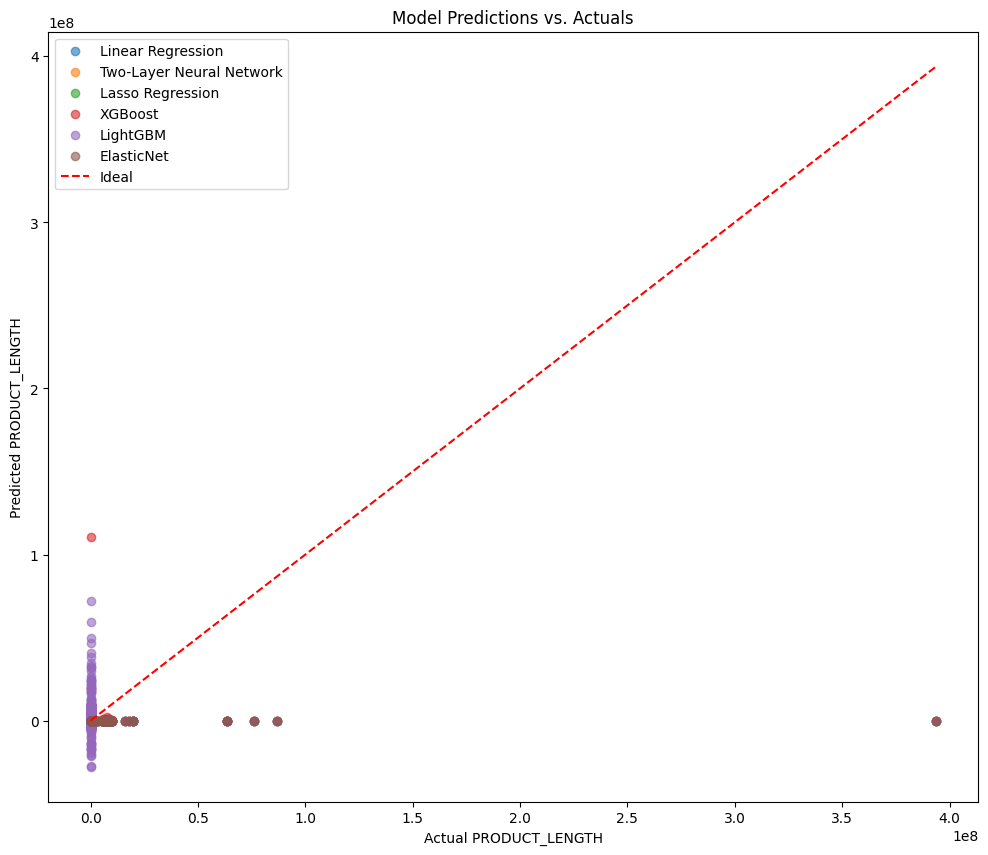

In [47]:
plt.figure(figsize=(12, 10))

plt.scatter(linear_actuals, linear_predictions, alpha=0.6, label='Linear Regression')

plt.scatter(nn_actuals, nn_predictions, alpha=0.6, label='Two-Layer Neural Network')

plt.scatter(lasso_actuals, lasso_predictions, alpha=0.6, label='Lasso Regression')

plt.scatter(xgb_actuals, xgb_predictions, alpha=0.6, label='XGBoost')

plt.scatter(lgbm_actuals, lgbm_predictions, alpha=0.6, label='LightGBM')

plt.scatter(elastic_actuals, elastic_predictions, alpha=0.6, label='ElasticNet')

actuals_min = min(
    linear_actuals.min(),
    nn_actuals.min(),
    lasso_actuals.min(),
    xgb_actuals.min(),
    lgbm_actuals.min(),
    elastic_actuals.min()
)
actuals_max = max(
    linear_actuals.max(),
    nn_actuals.max(),
    lasso_actuals.max(),
    xgb_actuals.max(),
    lgbm_actuals.max(),
    elastic_actuals.max()
)
plt.plot([actuals_min, actuals_max], [actuals_min, actuals_max], color='red', linestyle='--', label='Ideal')

plt.xlabel('Actual PRODUCT_LENGTH')
plt.ylabel('Predicted PRODUCT_LENGTH')
plt.title('Model Predictions vs. Actuals')
plt.legend()
plt.show()

Evaluation Metrics

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 3397.0857, RMSE: 633067.4375
